# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import srex_new_classes
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one
newStopWords = get_stop_words('en') # a big one
stop_words_list.extend(newStopWords) # all together

In [3]:
query                    = '"internet of things" OR iot'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_reference_terms  = True

In [4]:
ranking = srex_new_classes.Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_reference_terms, summarize)

In [6]:
for d in ranking.get_documents():
    print(f"TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

TITLE: A survey: security issues in IoT environment and IoT architecture (id:9546010)
txt: survey security issue iot environment iot architecture
txt: internet thing iot broadens future internet drawn much attention researcher
txt: 
txt: 
txt: paper threat security issue iot architecture investigated three layer
txt: 
txt: 
txt: due raise iot privacy safety concern iot becoming challenge social economic legal norm
txt: particular encouraged revisit iot security infrastructure adopt appropriate security measure secure data shared network iot environment thus making iot environment safer
TITLE: Designing Production-Grade and Large-Scale IoT Solutions: A comprehensive and practical guide to implementing end-to-end IoT solutions (id:10163357)
txt: designing iot solution comprehensive practical guide implementing iot solution
txt: get grip key iot aspect along modern trend architecture technology support iot solution cloud computing modern app architecture paradigm data analyticskey feature

In [7]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: A survey: security issues in IoT environment and IoT architecture
vecinity matrix: {'survey': {'iot': [0.0, 0.0, 1.0, 0.0]}, 'security': {'iot': [0.0, 1.0, 0.0, 1.0]}, 'issue': {'iot': [1.0, 0.0, 1.0, 0.0]}, 'environment': {'iot': [2.0, 0.0, 0.0, 0.0]}, 'architecture': {'iot': [1.0, 0.0, 1.0, 0.0]}}
vecinity matrix: {'internet': {'iot': [0.0, 1.0, 1.0, 0.0]}, 'thing': {'iot': [1.0, 0.0, 0.0, 0.0]}, 'broadens': {'iot': [1.0, 0.0, 0.0, 0.0]}, 'future': {'iot': [0.0, 1.0, 0.0, 0.0]}, 'drawn': {'iot': [0.0, 0.0, 0.0, 1.0]}}
vecinity matrix: {}
vecinity matrix: {}
vecinity matrix: {'paper': {'iot': [0.0, 0.0, 0.0, 1.0]}, 'threat': {'iot': [0.0, 0.0, 1.0, 0.0]}, 'security': {'iot': [0.0, 1.0, 0.0, 0.0]}, 'issue': {'iot': [1.0, 0.0, 0.0, 0.0]}, 'architecture': {'iot': [1.0, 0.0, 0.0, 0.0]}, 'investigated': {'iot': [0.0, 1.0, 0.0, 0.0]}, 'three': {'iot': [0.0, 0.0, 1.0, 0.0]}, 'layer': {'iot': [0.0, 0.0, 0.0, 1.0]}}
vecinity matrix: {}
vecinity matrix: {}
vecinity matrix: {'due': {'iot': 

In [8]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: iot OR iot
TERM: solution ; PONDERATION: 31.5 ; DISTANCE: 1.5
TERM: device ; PONDERATION: 26.7 ; DISTANCE: 1.6
TERM: security ; PONDERATION: 12.9 ; DISTANCE: 2.0
TERM: cellular ; PONDERATION: 12.0 ; DISTANCE: 1.6
TERM: technology ; PONDERATION: 11.2 ; DISTANCE: 1.7
TERM: architecture ; PONDERATION: 10.5 ; DISTANCE: 2.5
TERM: book ; PONDERATION: 10.2 ; DISTANCE: 2.3
TERM: system ; PONDERATION: 9.9 ; DISTANCE: 2.0
TERM: ot ; PONDERATION: 9.3 ; DISTANCE: 1.2
TERM: best ; PONDERATION: 9.2 ; DISTANCE: 2.9
TERM: building ; PONDERATION: 8.2 ; DISTANCE: 2.4
TERM: smart ; PONDERATION: 8.2 ; DISTANCE: 1.9
TERM: using ; PONDERATION: 7.7 ; DISTANCE: 2.3
TERM: enterprise ; PONDERATION: 7.4 ; DISTANCE: 2.4
TERM: environment ; PONDERATION: 7.3 ; DISTANCE: 1.6
TERM: internet ; PONDERATION: 7.2 ; DISTANCE: 2.4
TERM: data ; PONDERATION: 7.1 ; DISTANCE: 2.1
TERM: secure ; PONDERATION: 7.0 ; DISTANCE: 2.9
TERM: server ; PONDERATION: 7.0 ; DISTANCE: 1.9
TERM: platform ; PONDERATION: 6.7 ; DISTANC

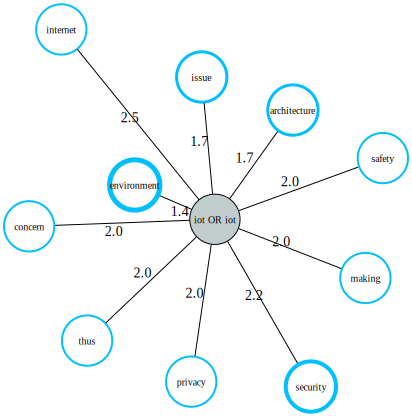

In [9]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

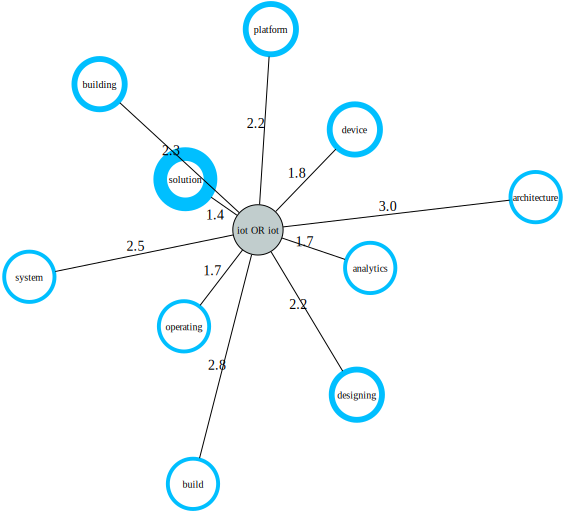

In [10]:
visual_graph2 = ranking.get_document_by_ranking_position(2).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

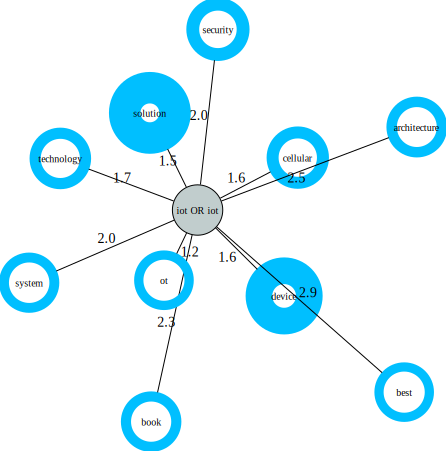

In [11]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [43]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(2).get_graph())

0.507421127280147